<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/Prisenmain_H3_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prise en main H3 Index**

In [ ]:
#Importation des librairies nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from h3 import h3

In [ ]:
#Téléchargement des arbres depuis l'opendata de Paris
!wget -O arbres.csv https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B 

--2021-02-07 21:54:42--  https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘arbres.csv’

arbres.csv              [              <=>   ]  30.14M   294KB/s    in 2m 6s   

2021-02-07 21:56:49 (244 KB/s) - ‘arbres.csv’ saved [31608080]



In [ ]:
#Importer CSV to dataframe

arbres = pd.read_csv("arbres.csv", sep=';')
arbres.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,275426,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,000511004,Tilleul,Tilia,tomentosa,NaN,108,10,A,NON,"48.8597190934,2.3114346242"
1,2004479,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,AVENUE DAUMESNIL,000402029,Marronnier,Aesculus,hippocastanum,NaN,120,12,J,NON,"48.8339878453,2.4169089158"
2,2012188,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,INSEP / AVENUE DU TREMBLAY,00040099,Erable,Acer,pseudoplatanus,NaN,50,12,A,NON,"48.8335214967,2.45485338706"
3,2008902,Arbre,DJS,PARIS 13E ARRDT,NaN,NaN,STADE CHARLETTY / 99 BOULEVARD KELLERMANN,00000113,Micocoulier,Celtis,australis,NaN,10,65,JA,NON,"48.816887752,2.3476422875"
4,208069,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000602009,Marronnier,Aesculus,x carnea,NaN,40,5,J,NON,"48.8400642578,2.38123463605"


In [ ]:
#Séparer la colonne des coordonnées géographiques

arbres[['Latitude','Longitude']] = arbres['geo_point_2d'].str.split(',', expand=True)
arbres.head()


,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,Latitude,Longitude,geometry
0,275426,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,000511004,Tilleul,Tilia,tomentosa,NaN,108,10,A,NON,"48.8597190934,2.3114346242",48.8597190934,2.3114346242,POINT (2.31143 48.85972)
1,2004479,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,AVENUE DAUMESNIL,000402029,Marronnier,Aesculus,hippocastanum,NaN,120,12,J,NON,"48.8339878453,2.4169089158",48.8339878453,2.4169089158,POINT (2.41691 48.83399)
2,2012188,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,INSEP / AVENUE DU TREMBLAY,00040099,Erable,Acer,pseudoplatanus,NaN,50,12,A,NON,"48.8335214967,2.45485338706",48.8335214967,2.45485338706,POINT (2.45485 48.83352)
3,2008902,Arbre,DJS,PARIS 13E ARRDT,NaN,NaN,STADE CHARLETTY / 99 BOULEVARD KELLERMANN,00000113,Micocoulier,Celtis,australis,NaN,10,65,JA,NON,"48.816887752,2.3476422875",48.816887752,2.3476422875,POINT (2.34764 48.81689)
4,208069,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000602009,Marronnier,Aesculus,x carnea,NaN,40,5,J,NON,"48.8400642578,2.38123463605",48.8400642578,2.38123463605,POINT (2.38123 48.84006)


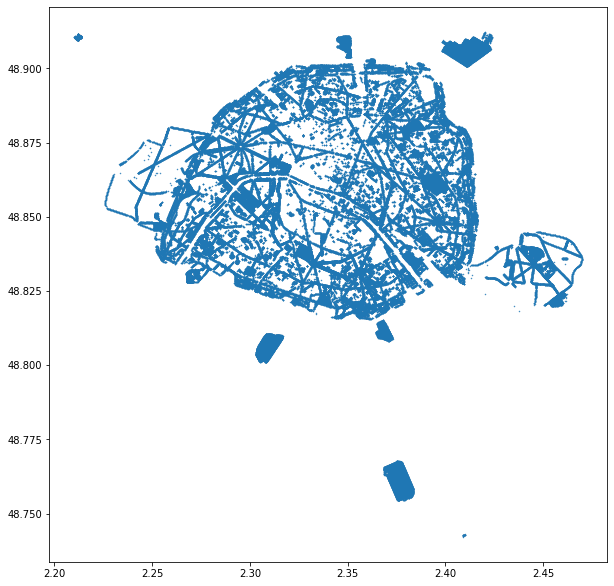

In [ ]:
#Dataframe to GeoDataframe

arbres = gpd.GeoDataFrame(arbres, crs = 'epsg:4326', geometry=gpd.points_from_xy(arbres.Longitude, arbres.Latitude))
arbres.plot(figsize=(10,12), markersize=0.2)

In [ ]:
# Définir le niveau et création de l'index spatial

h3_level = 11
 
def lat_lng_to_h3(row):
    return h3.geo_to_h3(
      row.geometry.y, row.geometry.x, h3_level)
 
ArbresParis['h3'] = ArbresParis.apply(lat_lng_to_h3, axis=1)

In [ ]:
# Agrgation statistique et décompte du nombre de maille

counts = ArbresParis.groupby(['h3']).h3.agg('count').to_frame('count').reset_index()
counts["h3"].size

21589

In [ ]:
# Création d'un Geodataframe avec le résumé statistique 

from shapely.geometry import Polygon
def add_geometry(row):
    points = h3.h3_to_geo_boundary(
      row['h3'], True)
    return Polygon(points)
 
counts['geometry'] = counts.apply(add_geometry, axis=1)
gdf = gpd.GeoDataFrame(counts, crs='EPSG:4326')
gdf.head()

,h3,count,geometry
0,8b1fb460d820fff,10,"POLYGON ((2.27101 48.82841, 2.27072 48.82827, ..."
1,8b1fb460d821fff,2,"POLYGON ((2.27162 48.82843, 2.27134 48.82829, ..."
2,8b1fb460d822fff,2,"POLYGON ((2.27077 48.82802, 2.27049 48.82788, ..."
3,8b1fb460d823fff,3,"POLYGON ((2.27139 48.82804, 2.27110 48.82790, ..."
4,8b1fb460d824fff,26,"POLYGON ((2.27063 48.82877, 2.27034 48.82864, ..."


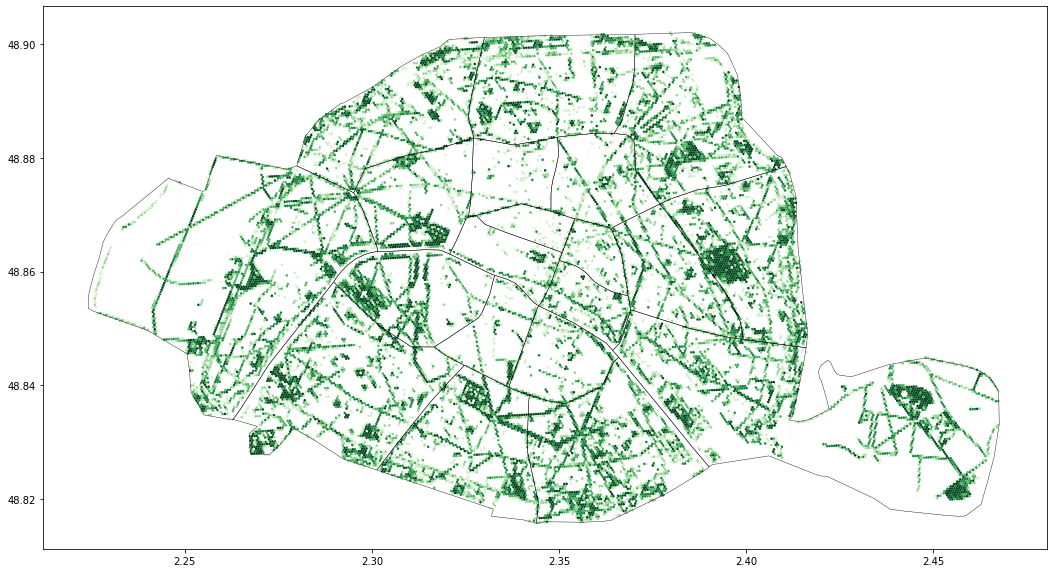

In [ ]:
#Cartographie

H3MAp, ax = plt.subplots(figsize=(18,16))
gdf.plot(ax=ax, column='count', figsize=(12, 8),k=6, cmap='Greens', scheme='quantiles')
ARDT.boundary.plot(ax=ax, linewidth=0.4, color = 'black')
plt.show()
